<a href="https://colab.research.google.com/github/kl2217/finite-element/blob/main/binomial_poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

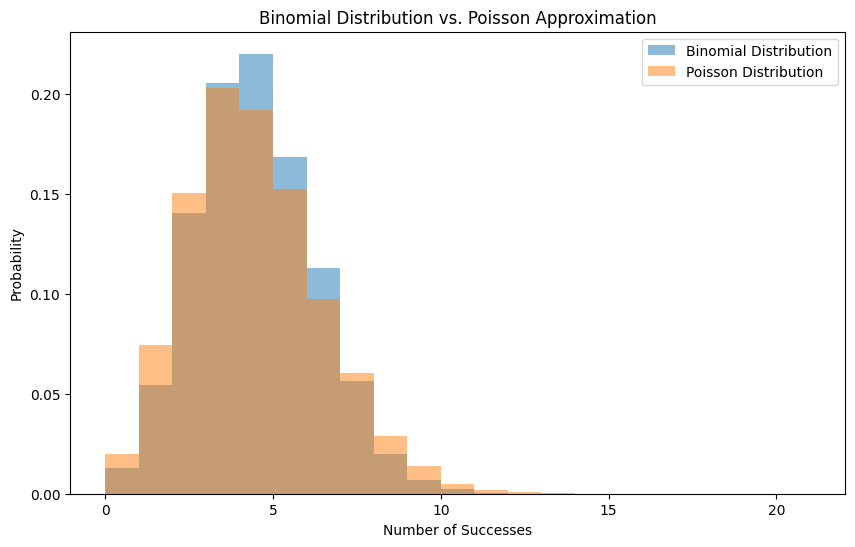

Binomial Mean: 4.00, Variance: 3.20
Poisson Mean: 3.96, Variance: 4.04


In [60]:
# make a sample demonstrate Model data using a Binomial distribution and approximate with the corresponding Poisson distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# Parameters for the binomial distribution
n = 20  # Number of trials
p = 0.2  # Probability of success (get head instead of tail), intentionally not set to 0.5

# Generate data from the binomial distribution
binomial_data = binom.rvs(n, p, size=10000)

# Approximate the binomial distribution with a Poisson distribution
lambda_poisson = n * p  # Mean of the Poisson distribution (equal to the mean of the binomial)

# Generate data from the Poisson distribution
poisson_data = poisson.rvs(lambda_poisson, size=10000)


# Create histograms for both distributions
plt.figure(figsize=(10, 6))
plt.hist(binomial_data, bins=range(n + 2), alpha=0.5, label='Binomial Distribution', density=True)
plt.hist(poisson_data, bins=range(n + 2), alpha=0.5, label='Poisson Distribution', density=True)
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution vs. Poisson Approximation')
plt.legend()
plt.show()

# Calculate the mean and variance for both
'''
Imagine you flipped a coin (an unfair one magicians use) 20 times and counted the number of heads.
You repeated this experiment many times and stored the results in binomial_data.
The line binomial_variance = np.var(binomial_data) calculates how spread out those head counts are.
A high variance means the head counts in your experiments differed a lot,
while a low variance means they were more consistent.
'''
binomial_mean = np.mean(binomial_data)
binomial_variance = np.var(binomial_data)

poisson_mean = np.mean(poisson_data)
poisson_variance = np.var(poisson_data)

print(f"Binomial Mean: {binomial_mean:.2f}, Variance: {binomial_variance:.2f}")
print(f"Poisson Mean: {poisson_mean:.2f}, Variance: {poisson_variance:.2f}")


In [61]:
print(binomial_data[:10])
print(poisson_data[:10])
print(len(binomial_data))
print(len(poisson_data))

[4 5 4 3 6 6 6 2 3 4]
[5 2 3 7 7 4 4 3 5 6]
10000
10000


**Binomial Distribution:**

$P(X = k) = \binom{n}{k} p^k (1 - p)^{(n - k)}$

**Poisson Distribution:**

$P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}$

In the Poisson approximation to the Binomial distribution, lambda (λ) is equal to n * p.

λ (lambda): The average rate of events in the Poisson distribution (also its mean and variance).

n: The number of trials in the Binomial distribution.

p: The probability of success in a single trial in the Binomial distribution.

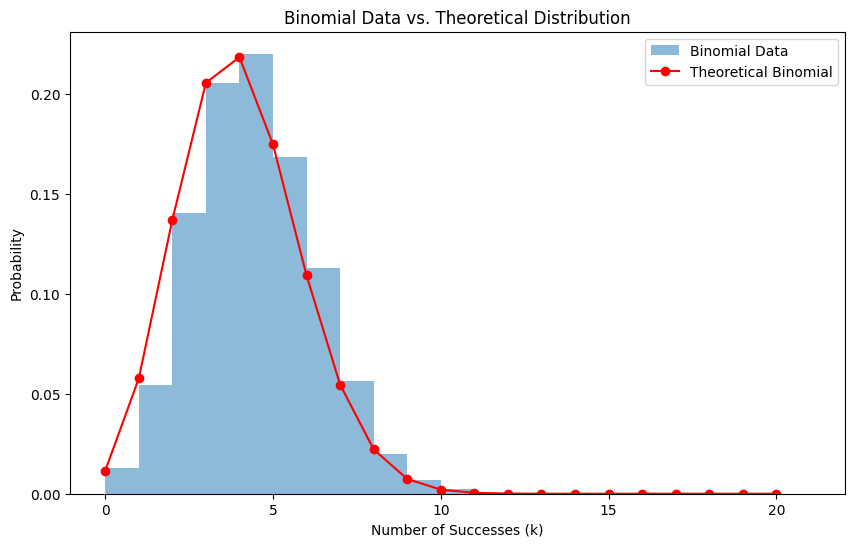

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Calculate theoretical probabilities
k_values = range(n + 1)  # Values of k (0 to n)
theoretical_probs = binom.pmf(k_values, n, p)

# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(binomial_data, bins=range(n + 2), alpha=0.5, label='Binomial Data', density=True)
plt.plot(k_values, theoretical_probs, 'ro-', label='Theoretical Binomial')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.title('Binomial Data vs. Theoretical Distribution')
plt.legend()
plt.show()

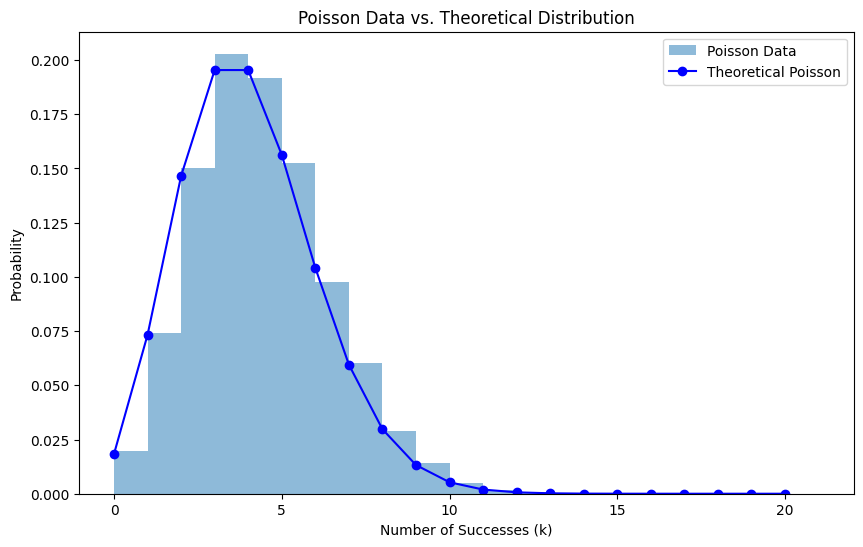

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Calculate theoretical probabilities for Poisson
k_values = range(n + 1)  # Values of k (0 to n) - Using the same range as Binomial for comparison
theoretical_probs_poisson = poisson.pmf(k_values, lambda_poisson)

# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(poisson_data, bins=range(n + 2), alpha=0.5, label='Poisson Data', density=True)
plt.plot(k_values, theoretical_probs_poisson, 'bo-', label='Theoretical Poisson')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.title('Poisson Data vs. Theoretical Distribution')
plt.legend()
plt.show()

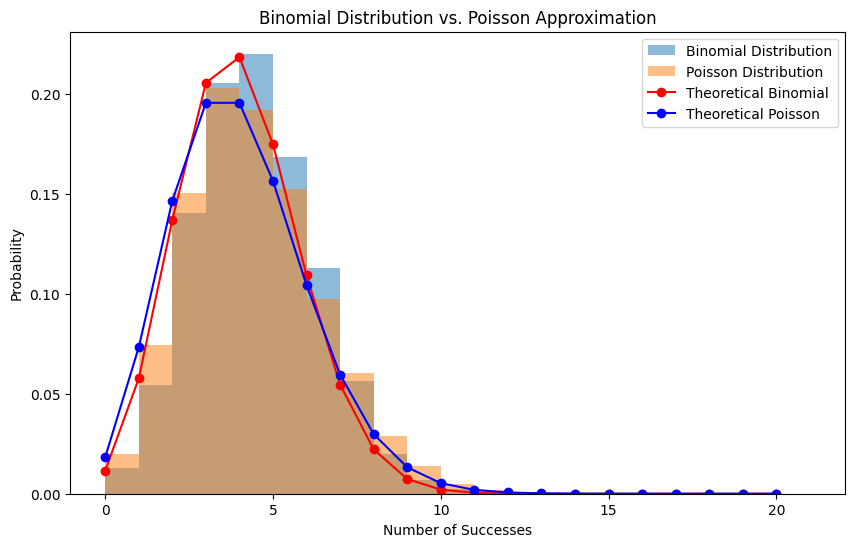

In [64]:
# Calculate theoretical probabilities for Binomial
k_values = range(n + 1)  # Values of k (0 to n)
theoretical_probs_binomial = binom.pmf(k_values, n, p)

# Calculate theoretical probabilities for Poisson
theoretical_probs_poisson = poisson.pmf(k_values, lambda_poisson)

# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(binomial_data, bins=range(n + 2), alpha=0.5, label='Binomial Distribution', density=True)
plt.hist(poisson_data, bins=range(n + 2), alpha=0.5, label='Poisson Distribution', density=True)

# Add theoretical plots
plt.plot(k_values, theoretical_probs_binomial, 'ro-', label='Theoretical Binomial')
plt.plot(k_values, theoretical_probs_poisson, 'bo-', label='Theoretical Poisson')

plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution vs. Poisson Approximation')
plt.legend()
plt.show()

The Poisson distribution is often used as an approximation of the Binomial distribution when n is large and p is small. Under this condition, the Binomial distribution starts to resemble rare events occurring over a large number of trials. This is exactly the scenario where the Poisson distribution is most applicable. The Poisson distribution can be derived as a limiting case of the Binomial distribution when n approaches infinity and p approaches 0, while keeping the product n * p (which represents the mean) constant.

Think of it this way:

Large n: You have many opportunities for an event to occur (e.g., many customers visiting a store).
Small p: The probability of the event happening in a single trial is low (e.g., a small chance of a customer making a purchase).
In this situation, the number of successes in the Binomial distribution becomes very similar to the number of events in a Poisson distribution, and therefore their means and variances converge.



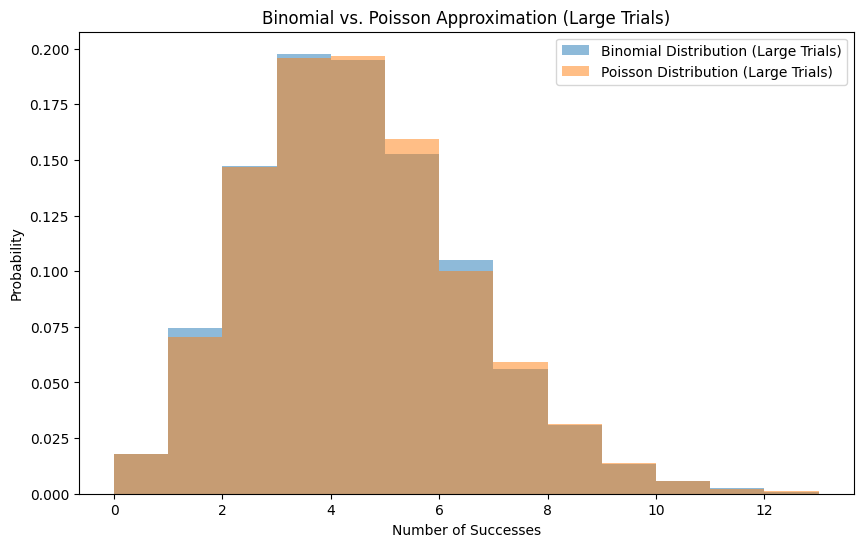

Binomial Mean (Large Trials): 3.99, Variance: 4.04
Poisson Mean (Large Trials): 4.02, Variance: 4.02


In [65]:
# large n, small p (for comparison)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson


# Parallel code with larger trials and smaller probability
# Parameters for the binomial distribution with larger trials and smaller probability
n_large = 1000  # Larger number of trials
p_small = 0.004  # Smaller probability of success

# Generate data from the binomial distribution
binomial_data_large = binom.rvs(n_large, p_small, size=10000)

# Approximate the binomial distribution with a Poisson distribution
lambda_poisson_large = n_large * p_small  # Mean of the Poisson distribution

# Generate data from the Poisson distribution
poisson_data_large = poisson.rvs(lambda_poisson_large, size=10000)

# Create histograms for both distributions
plt.figure(figsize=(10, 6))
plt.hist(binomial_data_large, bins=range(int(lambda_poisson_large) + 10), alpha=0.5, label='Binomial Distribution (Large Trials)', density=True)
plt.hist(poisson_data_large, bins=range(int(lambda_poisson_large) + 10), alpha=0.5, label='Poisson Distribution (Large Trials)', density=True)
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial vs. Poisson Approximation (Large Trials)')
plt.legend()
plt.show()

# Calculate the mean and variance for both
binomial_mean_large = np.mean(binomial_data_large)
binomial_variance_large = np.var(binomial_data_large)

poisson_mean_large = np.mean(poisson_data_large)
poisson_variance_large = np.var(poisson_data_large)

print(f"Binomial Mean (Large Trials): {binomial_mean_large:.2f}, Variance: {binomial_variance_large:.2f}")
print(f"Poisson Mean (Large Trials): {poisson_mean_large:.2f}, Variance: {poisson_variance_large:.2f}")

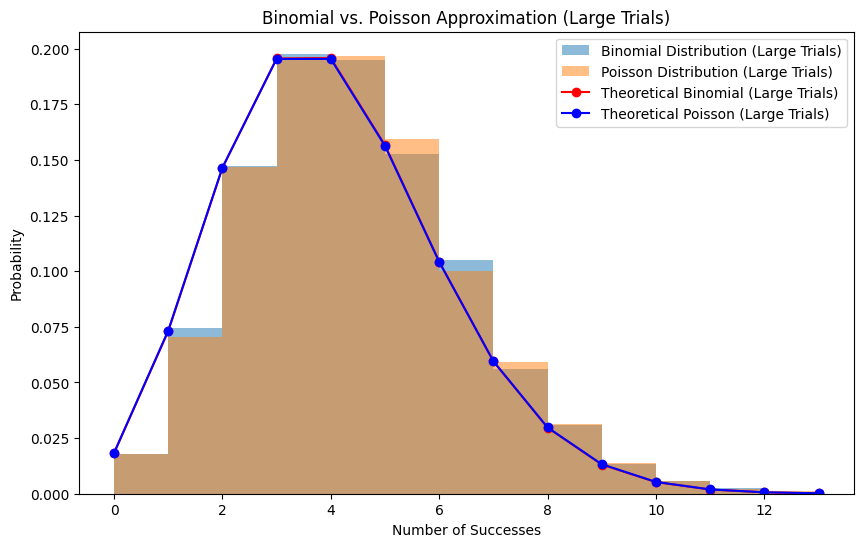

In [66]:

# Calculate theoretical probabilities for Binomial (large n, small p)
k_values_large = range(int(lambda_poisson_large) + 10)  # Adjust range for larger values
theoretical_probs_binomial_large = binom.pmf(k_values_large, n_large, p_small)

# Calculate theoretical probabilities for Poisson (large n, small p)
theoretical_probs_poisson_large = poisson.pmf(k_values_large, lambda_poisson_large)

# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(binomial_data_large, bins=range(int(lambda_poisson_large) + 10), alpha=0.5, label='Binomial Distribution (Large Trials)', density=True)
plt.hist(poisson_data_large, bins=range(int(lambda_poisson_large) + 10), alpha=0.5, label='Poisson Distribution (Large Trials)', density=True)

# Add theoretical plots
plt.plot(k_values_large, theoretical_probs_binomial_large, 'ro-', label='Theoretical Binomial (Large Trials)')
plt.plot(k_values_large, theoretical_probs_poisson_large, 'bo-', label='Theoretical Poisson (Large Trials)')

plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial vs. Poisson Approximation (Large Trials)')
plt.legend()
plt.show()


let's explore the theoretical reason why the variance of a Binomial distribution with large n (number of trials) and small p (probability of success) is approximately equal to its mean, which is a characteristic shared with the Poisson distribution.

Binomial Distribution:

Mean: The mean (μ) of a Binomial distribution is given by: μ = n * p
Variance: The variance (σ²) of a Binomial distribution is given by: σ² = n * p * (1 - p)
Poisson Distribution:

Mean: The mean (λ) of a Poisson distribution is given by: λ
Variance: The variance (σ²) of a Poisson distribution is also given by: λ

The Connection:

Now, let's consider the case where n is large and p is small. In this scenario, (1 - p) is approximately equal to 1.

Therefore, the variance of the Binomial distribution becomes:

σ² ≈ n * p * (1)

σ² ≈ n * p

Notice that this is the same as the mean of the Binomial distribution (μ = n * p).